In [1]:
# Import necessary libraries.
import re, string, unicodedata
import nltk                                             # Natural language processing tool-kit

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas
import seaborn as sns 
import matplotlib.pyplot as plt                         # Import plt for visualization# Import pandas.
import warnings                                                           
warnings.filterwarnings("ignore")

!pip install contractions
import contractions
import wordcloud

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')                                  # Download Punctuations
nltk.download('wordnet')                                # Download Wordnet   

from bs4 import BeautifulSoup                           # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\john.NA\Anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\john.NA\Anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\john.NA\Anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load dataset
data=pd.read_csv('Tweets.csv')

In [3]:
# Print the shape of data
data.shape   

(14640, 15)

- There are 14640 rows and 15 columns.

In [4]:
data.head()  

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


- There is not much take on from the above description of the dataset. It seems travellers are mostly confident on their sentiments.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- All the variables are of object-type except tweet_id, airline_sentiment_confidence, egativereason_confidence and retweet_count variables.

#### Missing Value analysis

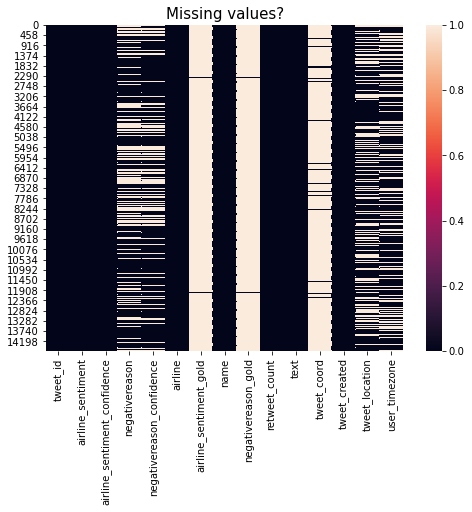

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- Based on the plot above, there are many missing values in the 'negativereason, 'negativereason_confidence', 'tweet location' and 'user_timezone' variables
- Majority of obseravations are missing in 'airline_sentiment_gold', 'negativereason_gold' and 'tweet_coord' variables.

In [8]:
data.isnull().sum(axis=0)   

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- The data above show the exact number of missing observations of the variables.

# Exploratory Data Analysis (EDA)

### Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

<AxesSubplot:xlabel='airline', ylabel='count'>

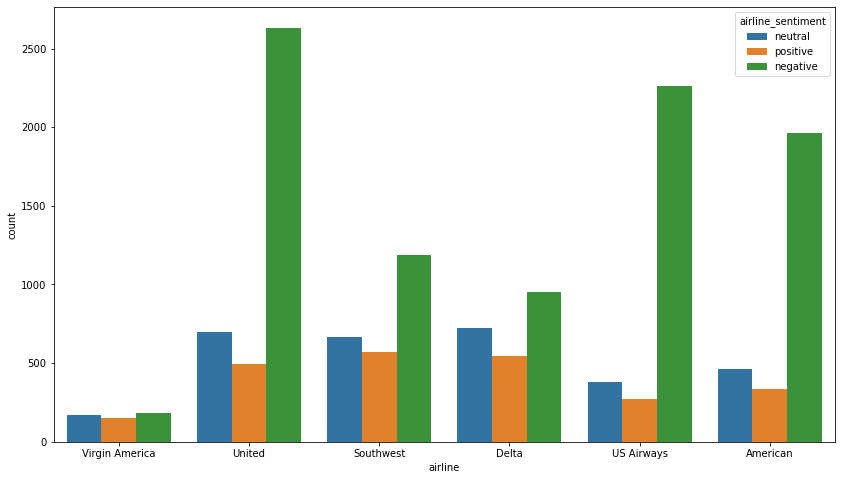

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(data['airline'],hue=data['airline_sentiment'])

- The bar plot above shows that all airline companies in the dataset have the higher number of negative sentiment tweets than that of the neutral and positive sentiment ones.
- United, US Airways and American are the worst airline industries in terms of customer satisfaction (negative tweets).
- Southwest and Delta Airlines have also higher negative tweets but there are not much  difference among the other sentiments.
- The dataset has considerably less observation for Virgin America airlines. Its sentiment ratio is almost the same.
- Based on this dataset, Virgin America, Delta and Southwest are in better situation considering the customer satisfaction.

### Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

<AxesSubplot:xlabel='airline', ylabel='count'>

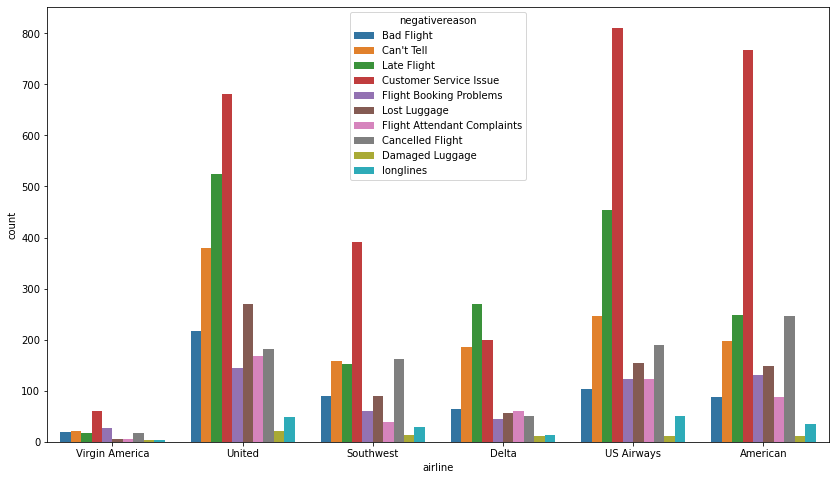

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(data['airline'],hue=data['negativereason'])

- The bar plot above shows the reasonings behind the negative sentiment tweets written for airline companies in the dataset.
- Interestingly enough, the farmost reason for negative tweets is 'customer service issue' for all airlines except Delta.
- The second most important reason seems to be 'Late Flight'. Especially, United, US Airways and Delta airlines are suffering with late flights.
- Too many customers also prefer to not talk about the reasoning-'Can't Tell'. It is a surprising fact that the number of these customers are more than or almost the same those who give reason as 'Cancelled Flight' in United, Southwest, Delta, Virgin America and US Airways. Because of this large number, 'Can't Tell' may hide important contribution to reasonings behind the dissatisfaction.
- It seems 'Lost Luggage' is another important reason for the negative tweets.

#### **Word Cloud for Positive and Negative Sentiments**

In [11]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting text column into list
    stopwords = set(wordcloud.STOPWORDS)                               # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

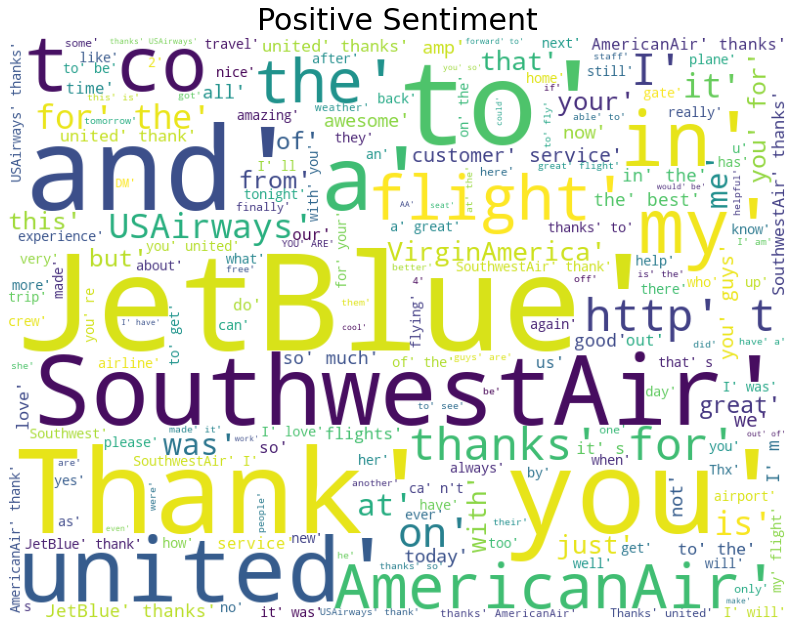

In [12]:
# Show Word Cloud for Positive Sentiments
show_wordcloud(data[data.airline_sentiment == 'positive'], title = "Positive Sentiment")

- The wordcloud above shows that most of the positive sentiments goes to JetBlue, Southwest Air and relatively less to United.
- 'Thank you' seems to be used the most by the travellers who give positive sentiment.
- Since this is a raw data, the cloud is dirty with not-preprocessed words such as http, on, the and so on. 

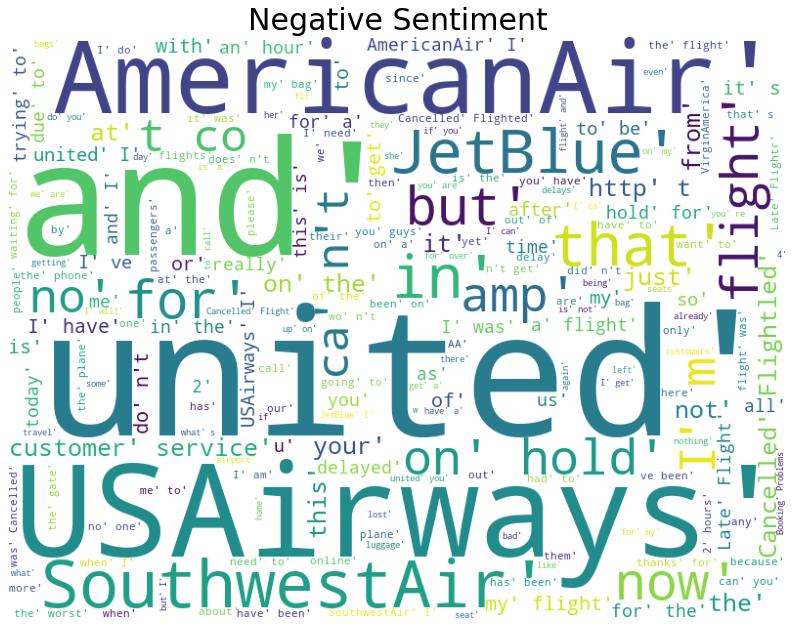

In [13]:
# Show Word Cloud for Negative Sentiments
show_wordcloud(data[data.airline_sentiment == 'negative'], title = "Negative Sentiment")

- The wordcloud above shows that most of the negative sentiments goes to United, USAirways, AmericanAir and relatively less to Southwest and JetBlue.
- 'Flight' seems to be used the most by the travellers who give negative sentiment.

# Understanding of Data Columns

In [14]:
# Keep the only variables 'text' and 'airine_sentiment' in the dataset.
data = data.loc[:,['text','airline_sentiment']]

In [15]:
# Shape of the data
data.shape

(14640, 2)

- We have the same number of rows with only 2 columns.

In [16]:
# Print 5 rows of the data
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, 've, added, comm...",positive
2,"[@, VirginAmerica, I, did, n't, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, 's, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, 's, a, really, big...",negative


- Again, there are only 2 columns of text andairline_sentiment.

# Data Pre-Processing

In [17]:
# Html tag removal
def strip_html(text):
    soup = BeautifulSoup(str(text), "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

In [18]:
# Replace the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

In [19]:
# Removal of numbers
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

In [20]:
# Tokenization of the dataa
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [21]:
# Removal of special characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from the list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [22]:
# Removal of punctuations
def remove_punctuation(words):
    """Remove punctuation from the list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [23]:
# Removal of stopwords
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

## Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist))

def remove_stopwords(words):
    """Remove stopwords from the list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [24]:
# Conversion to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from the list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [25]:
# Lemmetize
def lemmatize_list(words):
    lemmatizer = WordNetLemmatizer()
    """Lemmetize the words from the list of tokenized words"""
    new_words = []
    for word in words:
        new_word = lemmatizer.lemmatize(word, pos='v')  
        new_words.append(new_word)
    return new_words

In [26]:
# Join the words
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()


,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica nt today must mean need take ano...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


### **Building the model based on CountVectorizer and Random Forest**

In [27]:
# Assign categorical numbers (0,1,2) to sentiments on the airline-sentiment column in the data set
data.airline_sentiment = pd.Categorical(data.airline_sentiment)
data['sentiment'] = data.airline_sentiment.cat.codes
data.head()

,text,airline_sentiment,sentiment
0,virginamerica dhepburn say,neutral,1
1,virginamerica plus add commercials experience ...,positive,2
2,virginamerica nt today must mean need take ano...,neutral,1
3,virginamerica really aggressive blast obnoxiou...,negative,0
4,virginamerica really big bad thing,negative,0


- Airline sentiments are assigned to categorical numbers as hown above: negative=0; neutral=1, and positive=2.

In [28]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000)        # Keep only 2000 features as number of features will increase the processing time.       
data_features = cv.fit_transform(data['text'])

data_features = data_features.toarray()        # Convert the data features to array.

In [29]:
data_features.shape

(14640, 2000)

In [30]:
# Copy the sentiment column to sentiment object.
sentiment = data['sentiment']
sentiment = sentiment.astype('int')

In [31]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, sentiment, test_size=0.3, random_state=42)

In [32]:
# Using Random Forest to build model for the classification of text comments.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, data_features, sentiment, cv=10))) # calculate and print the cross validation score

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7130464480874317


#### **Optimizing the parameter to increase the accuracy: Number of trees in the random forest model(n_estimators)**

In [33]:
# Finding optimal number of base learners using k-fold CV
base_ln = [x for x in range(1, 30)]

- First, I used the range(1, 20) but I saw from the corresponding plot that the error seems not minimized with this range so that's why I decided to increse the range to 30.

In [34]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

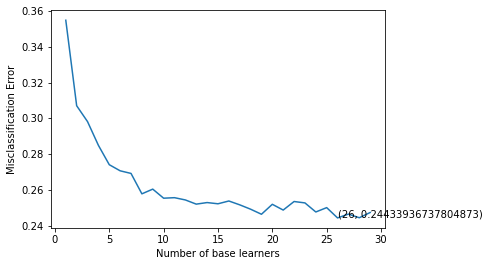

In [35]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                           # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]          # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                     # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- The plot above shows that the number of base learners minimizing the error is 24.

In [36]:
# Training the best model and calculating accuracy on test data
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7682149362477231

In [37]:
# Save the prediction on test data as a result_CV (result using CountVectorize)
result_CV =  clf.predict(X_test)                  

[[2535  209   70]
 [ 386  423   75]
 [ 182   96  416]]
0.7682149362477231


<AxesSubplot:>

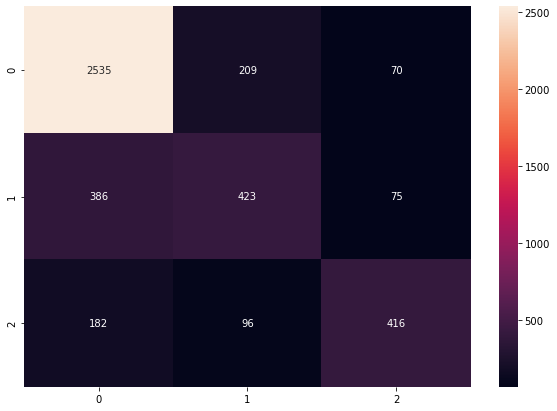

In [38]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result_CV)

print(conf_mat)

print(metrics.f1_score(y_test, result_CV, average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Results using CountVectorize:
- Before optimizing the parameters, cross validation score = 0.71
- After optimizing the parameters, cross validation score = 0.77. There is a 6 percentage point increase but still not satisfactory score.
- The confusion matrix reflects the low cross validation score. There is a misclassification for all sentiment types in different degrees.

#### **WordCloud of top 40 important features from the CountVectorizer + Random Forest based model**

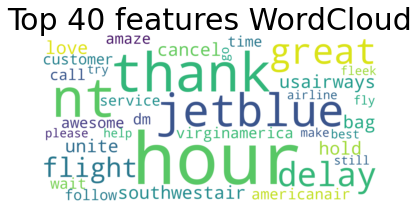

In [39]:
all_features = cv.get_feature_names()          # Instantiate the feature from the vectorizer
top_features=''                                # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

- As shown on the WordCloud, the top 40 features include the words hour, thank, jetblue, great, flight, delay etc... 

### **Building a model based on Term Frequency(TF) - Inverse Document Frequency(IDF) Vectorizer and Random Forest**

In [40]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000)                 # Keep only 2000 features as number of features will increase the processing time. 
data_features = tfidf.fit_transform(data['text'])

data_features = data_features.toarray()                    # Convert the data features to array.

In [41]:
# Shape of the data
data_features.shape

(14640, 2000)

In [42]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, sentiment, test_size=0.3, random_state=42)

In [43]:
# Using Random Forest to build model for the classification of text comments.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, data_features, sentiment, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7085382513661203


In [44]:
# K - Fold Cross Validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

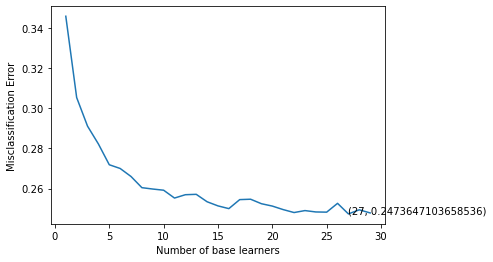

In [45]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                               # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]              # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                         # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [46]:
# Training the best model and calculating error on test data
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7709471766848816

In [47]:
result_TFIDF = clf.predict(X_test)

[[2639  128   47]
 [ 450  374   60]
 [ 222   99  373]]
0.7709471766848816


<AxesSubplot:>

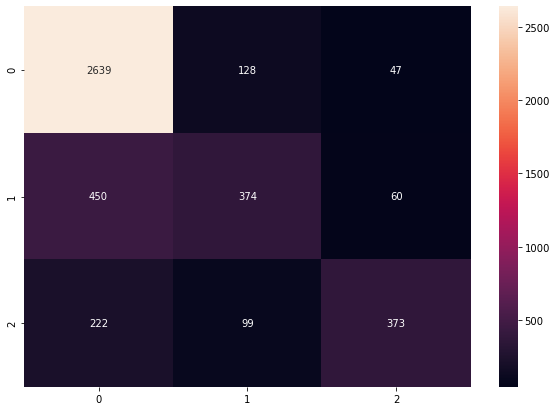

In [48]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result_TFIDF)

print(conf_mat)
print(metrics.f1_score(y_test, result_TFIDF, average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Results using TF-IDF Vectorizer:
- Before optimizing the parameters, cross validation score = 0.71
- After optimizing the parameters, cross validation score = 0.77. There is a 6 percentage point increase but still not satisfactory score.
- The confusion matrix reflects the low cross validation score. There is a misclassification for all sentiment types in different degrees.

Based on these results, both CountVectorizer and TF-IDF Vectorizer give very similar results. More tuning the parameters might help increase the accuracy of the model.

#### **WordCloud of top 40 important features from the TF-IDF + Random Forest based model**

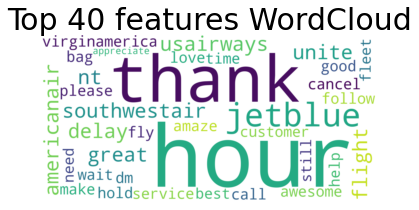

In [49]:
all_features = tfidf.get_feature_names()           # Instantiate the feature from the tfidf vectorizer
Top_features=''                                    # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=2000, 
                          height=1000).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

- As shown on the WordCloud, the top 40 features include the words hour, thank, jetblue, please, cancel, great etc...

# Summary

- The dataset is about the tweets of airline traveller expressing their opinion/experience on the flight.
- Among many other information, the dataset includes customer sentiment - neutral, negative or positive.
- The task was about to classification the tweets based on the sentiments using NLP.
- First, I examined the raw data by creating bar charts. It helped me to see distribution of sentiments among the airlines and the reasoning behind the sentiments especially negative sentiments.
- Before the pre-processing, the data was cleaned leaving only text and sentiment columns.
- The data should be ready to use vectorization and create a model.
- So, pre-processing was implemented one by one - HTML tag removal, removal of numbers, removal of special characters and punctuations, tokenization etc.
- The pre-processed data was converted to numbers (vectorized), so that we could be able to feed the data into model.
- I used both CountVectorizer and TF-IDF Vectorizer.
- Sentiment in the dataset was in object-type. I also categorized it by giving the numbers 0,1, and 2.
- I used RandomForest model. I trained the model and optimized the number of base learners to increase the overall accuracy.
- After building the classification model, I predicted the results for the test data.
- I found the accuracy results almost the same for both vectorization techniques which is 0.77.
- This result is good but not satisfactory. 
- Other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques migh help increase the overall accuracy.
- I used 2000 as max_feature parameter. We can also increase the max_feature parameter.
- WordClouds - It is nice future to see clearly the words the most used.